In [326]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [327]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
dfBikes = pd.read_csv("day.csv")
dfBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [329]:
dfBikes.shape

(730, 16)

In [330]:
dfBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [331]:
# NCPENDING: EDA
# NCPENDING: Data cleanup

dfBikes = dfBikes.drop(['instant','casual','registered', 'dteday'], axis=1)

dfBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [332]:
# Replace Categorical Values with meaningful names

import calendar

dfBikes['season'] = dfBikes['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

dfBikes['weekday'] = dfBikes['weekday'].map({1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6:'saturday', 0: 'sunday'})

dfBikes['workingday'] = dfBikes['workingday'].map({1: 'workingday', 0: 'nonworkingday'})

dfBikes['holiday'] = dfBikes['holiday'].map({1: 'holiday', 0: 'nonholiday'})

dfBikes['weathersit'] = dfBikes['weathersit'].apply(lambda x: 'weathersit_' + str(x))

dfBikes['mnth'] = dfBikes['mnth'].apply(lambda x: calendar.month_abbr[x])

dfBikes.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,nonholiday,saturday,nonworkingday,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,nonholiday,sunday,nonworkingday,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,nonholiday,monday,workingday,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,nonholiday,tuesday,workingday,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,nonholiday,wednesday,workingday,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


In [333]:
# Replace the Categorical Variables with Dummy values

categorical_variables = ['season', 'weekday', 'workingday', 'holiday', 'weathersit', 'mnth']

for cat_var in categorical_variables:
    print('Setting dummy variables for ' + cat_var)

    dfBikes[cat_var] = dfBikes[cat_var].astype('category')

    cat_dummies_columns =  pd.get_dummies(dfBikes[cat_var], drop_first=True)

    dfBikes = pd.concat([dfBikes, cat_dummies_columns], axis=1)

    dfBikes.drop([cat_var], axis=1, inplace=True)

    print(dfBikes.head())

    print('------------------------------')


print('After replacing categorical variables with dummy values:')
print(dfBikes.head(10))

Setting dummy variables for season
   yr mnth     holiday    weekday     workingday    weathersit       temp  \
0   0  Jan  nonholiday   saturday  nonworkingday  weathersit_2  14.110847   
1   0  Jan  nonholiday     sunday  nonworkingday  weathersit_2  14.902598   
2   0  Jan  nonholiday     monday     workingday  weathersit_1   8.050924   
3   0  Jan  nonholiday    tuesday     workingday  weathersit_1   8.200000   
4   0  Jan  nonholiday  wednesday     workingday  weathersit_1   9.305237   

      atemp      hum  windspeed   cnt  spring  summer  winter  
0  18.18125  80.5833  10.749882   985       1       0       0  
1  17.68695  69.6087  16.652113   801       1       0       0  
2   9.47025  43.7273  16.636703  1349       1       0       0  
3  10.60610  59.0435  10.739832  1562       1       0       0  
4  11.46350  43.6957  12.522300  1600       1       0       0  
------------------------------
Setting dummy variables for weekday
   yr mnth     holiday     workingday    weathersit

In [334]:
dfBikes.shape

(730, 29)

### Split the data into Test & Train data sets       

In [335]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
dfBikes_train, dfBikes_test = train_test_split(dfBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [336]:
print(dfBikes_train.shape)

print(dfBikes_test.shape)

(510, 29)
(219, 29)


## Scale the features       

In [337]:
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [338]:
dfBikes_train[numerical_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.102429,23.493909,63.112926,12.831318,4486.382353
std,7.431169,8.090038,14.156632,5.291832,1952.158739
min,2.424346,3.953480,0.000000,2.834381,22.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,20.209597,24.020400,63.437500,12.083182,4530.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000
max,35.328347,42.044800,97.041700,34.000021,8714.000000


In [339]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfBikes_train[numerical_variables] = scaler.fit_transform(dfBikes_train[numerical_variables])

In [340]:
dfBikes_train[numerical_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


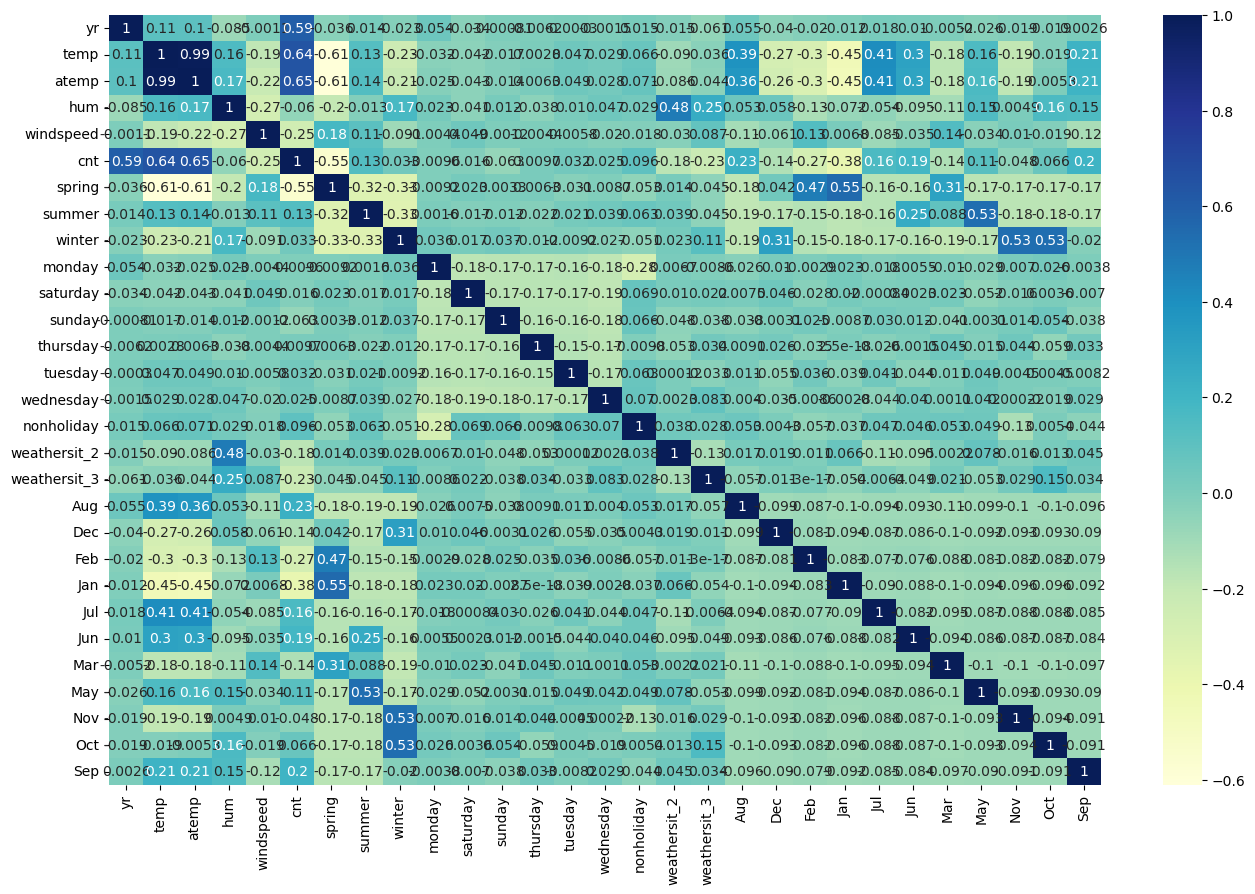

In [341]:
plt.figure(figsize = (16, 10))
sns.heatmap(dfBikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building a Linear Model

In [ ]:
import statsmodels.api as sm

# Function to construct a linear model
def ConstructLinearRegressionModel(X_train, y_train):
    # Add a constant
    X_train_lm = sm.add_constant(X_train)

    # Create a first fitted model
    lrModel = sm.OLS(y_train, X_train_lm).fit()

    return lrModel


In [ ]:
# Function to calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [342]:
y_train = dfBikes_train.pop('cnt')

X_train_model1 = dfBikes_train

X_train_model1.head()

,yr,temp,atemp,hum,windspeed,spring,summer,winter,monday,saturday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lr_model_1 = ConstructLinearRegressionModel(X_train_model1, y_train)

print(lr_model_1.summary())

In [351]:
Calculate_VIF(X_train)

        Features     VIF
1           temp  432.54
2          atemp  383.17
3            hum   39.74
14    nonholiday   32.29
5         spring   12.38
7         winter   12.18
6         summer    7.94
26           Oct    6.51
17           Aug    6.46
25           Nov    6.16
21           Jul    5.63
4      windspeed    5.56
20           Jan    5.49
18           Dec    5.16
27           Sep    4.56
19           Feb    4.11
23           Mar    3.53
22           Jun    3.07
24           May    2.45
15  weathersit_2    2.40
13     wednesday    2.28
9       saturday    2.23
8         monday    2.20
10        sunday    2.16
0             yr    2.15
11      thursday    2.07
12       tuesday    2.04
16  weathersit_3    1.32


### Regression using RFE

In [348]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression


# lm = LinearRegression()
# lm.fit(X_train, y_train)

# rfe = RFE(lm, step=10)          # running RFE
# rfe = rfe.fit(X_train, y_train)

In [349]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))